### Programming Assignment 1: ***Exploratory Data Analysis***
# <span style="color:#1DB954;">**MOST STREAMED SPOTIFY SONGS 2023**</span> <img src="spotify_logo.png" style="width:100px; height:100px; vertical-align:middle;">
#### Group Members:
**Bolinas**, Denisse Roxanne H.  
**De Leola**, Miguel S.  
**Ugates**, John Rhey T.  

---


#### *Importing Necessary Libraries*

In [79]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#Import relevant modules from scikit-learn for machine learning tasks
from sklearn.impute import SimpleImputer

#Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")

#Load the Dataset
spotify_df = pd.read_csv("spotify_2023.csv", engine='python', encoding="ISO-8859-1")

---

### **1. Overview of the Dataset**

In [80]:
pd.pandas.set_option('display.max_columns', None) #"None" Removes the limit on how many columns can be shown
spotify_df.head() #Displays the first 5 rows of the dataframe

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


#### ***How many rows and columns does the dataset contain?***

In [81]:
num_rows, num_columns = spotify_df.shape #Returns the dimensions of the dataframe as a tuple
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 953
Number of Columns: 24


- The dataset contains 953 rows and 24 columns.

#### ***What are the data types of each column? Are there any missing values?***

##### **Data types of each column:**

In [82]:
print(spotify_df.dtypes) #Returns the data type of each column


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


- The 'streams', 'in_deezer_playlists', and 'in_shazam_charts' columns have the incorrect data types. 

##### **Number of missing values:**

In [83]:
missing_values = spotify_df.isnull().sum() #Counts missing values per column
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


- The 'in_shazam_charts' column has 50 missing values, while the 'key' column has 95 missing values.

**Converting to the Appropriate Data Type**

- Since the 'streams', 'in_deezer_playlists', and 'in_shazam_charts' columns have the incorrect data types. These columns will be converted from objects into integers (int64).

In [84]:
#Converts values in the 'streams' column to integers
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce').fillna(0).astype(int) 

#Converts values in the 'in_deezer_playlists' column to integers
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce').fillna(0).astype(int)

#Converts values in the 'in_shazam_charts' column to integers
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce').fillna(0).astype(int)

#Returns the data type of each column
print(spotify_df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


**Dealing with Missing Values**

- To fill the missing values, mean imputation was used for the 'in_shazam_charts' column to maintain the numerical integrity of the data, while most frequent imputation was used for the 'key' column to retain the categorical nature of the data

In [85]:
#Fill missing values in 'in_shazam_charts' column with the mean
imp = SimpleImputer(strategy='mean')
spotify_df['in_shazam_charts'] = imp.fit_transform(spotify_df['in_shazam_charts'].values.reshape(-1, 1))

# Fill missing values in 'key' column with the most frequent value and convert to 1D array
imp = SimpleImputer(strategy='most_frequent')
spotify_df['key'] = imp.fit_transform(spotify_df['key'].values.reshape(-1, 1)).ravel()
print(spotify_df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


---

### **2. Basic Descriptive Statistics**

#### ***What are the mean, median, and standard deviation of the streams column?***

In [86]:
#Mean
mean_value = spotify_df['streams'].mean()
print(f"Mean: {mean_value:,}") #":," Adds commas as thousands separators to numbers

#Median
median_value = spotify_df['streams'].median()
print(f"Median: {median_value:,}")

#Standard Deviation
std_value = spotify_df['streams'].std()
print(f"Standard Deviation: {std_value:,}")

Mean: 513,597,931.3137461
Median: 290,228,626.0
Standard Deviation: 566,803,887.0588315


- The streams column has a mean of 513,597,931.3137461, median of 290,228,626.0, and a standard deviation of 566,803,887.0588315.

#### ***What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?***

##### **Distribution of Released Year and Artist Count:**

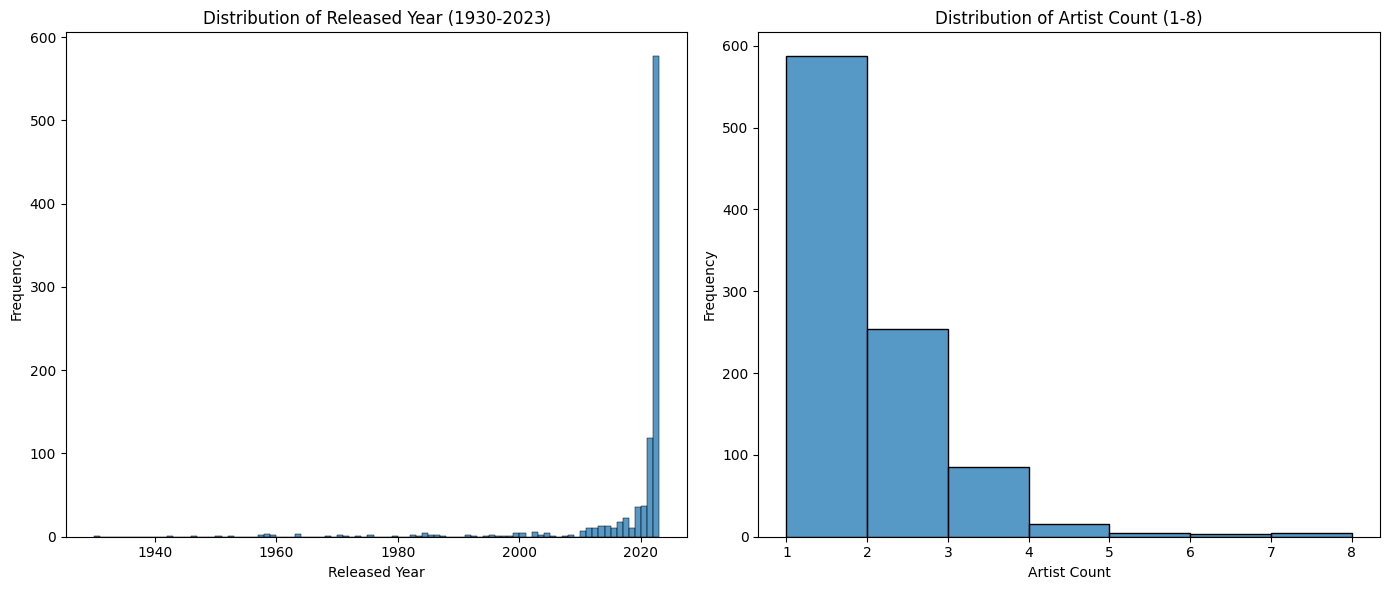

In [102]:
# Create a figure with subplots for released_year and artist_count
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the distribution of released_year
sns.histplot(spotify_df['released_year'], bins=np.arange(1930, 2024, 1), ax=axes[0])
axes[0].set_title('Distribution of Released Year (1930-2023)')
axes[0].set_xlabel('Released Year')
axes[0].set_ylabel('Frequency')

# Plotting the distribution of artist_count
sns.histplot(spotify_df['artist_count'], bins=np.arange(1, 9, 1), ax=axes[1])
axes[1].set_title('Distribution of Artist Count (1-8)')
axes[1].set_xlabel('Artist Count')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

- In the 2000s, the number of released songs increased gradually.
- Solo artists appear to have released more songs than artists in groups of two or more.

### **3. Top Performers**






#### ***Which track has the highest number of streams? Display the top 5 most streamed tracks.***

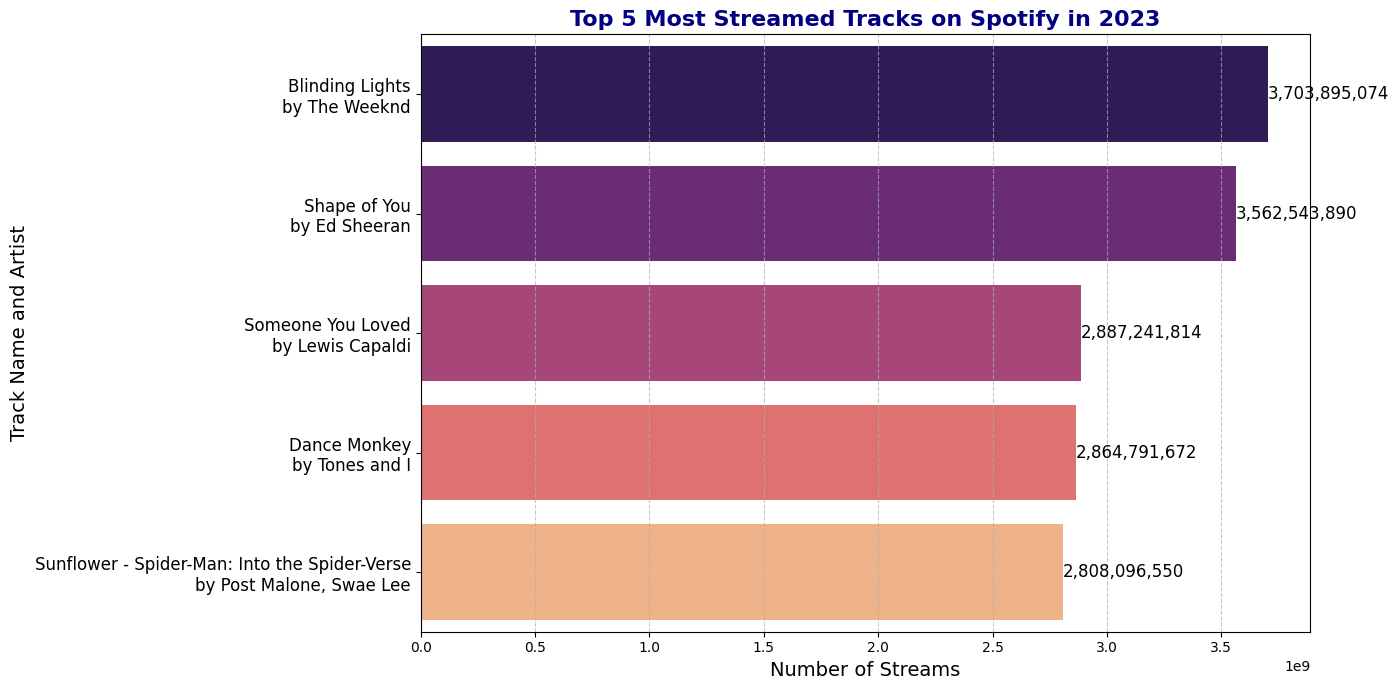

In [106]:
# Sort the DataFrame by the 'streams' column in descending order
top_5_streamed_tracks = spotify_df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# Combine track name and artist name into a single column for the y-axis
top_5_streamed_tracks['track_artist'] = top_5_streamed_tracks['track_name'] + "\n" + "by " + top_5_streamed_tracks['artist(s)_name']

# Create a bar plot for the top 5 most streamed tracks
plt.figure(figsize=(14, 7))  # Increased width for better spacing

# Create the bar plot
bar_plot = sns.barplot(x='streams', y='track_artist', data=top_5_streamed_tracks, palette='magma')

# Add data labels on top of the bars
for index, value in enumerate(top_5_streamed_tracks['streams']):
    bar_plot.text(value, index, f'{int(value):,}', color='black', ha='left', va='center', fontsize=12)

# Customize the plot
plt.title('Top 5 Most Streamed Tracks on Spotify in 2023', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Number of Streams', fontsize=14)
plt.ylabel('Track Name and Artist', fontsize=14)

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0, fontsize=12)  # Adjust fontsize if needed
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

- The top 5 most streamed songs are big hits by famous artists are: Weeknd, Ed Sheeran, Lewis Capaldi, Tones and I, and Post Malone and swae, each with billions of plays, showing their wide popularity and appeal.

#### ***Who are the top 5 most frequent artists based on the number of tracks in the dataset?*** 

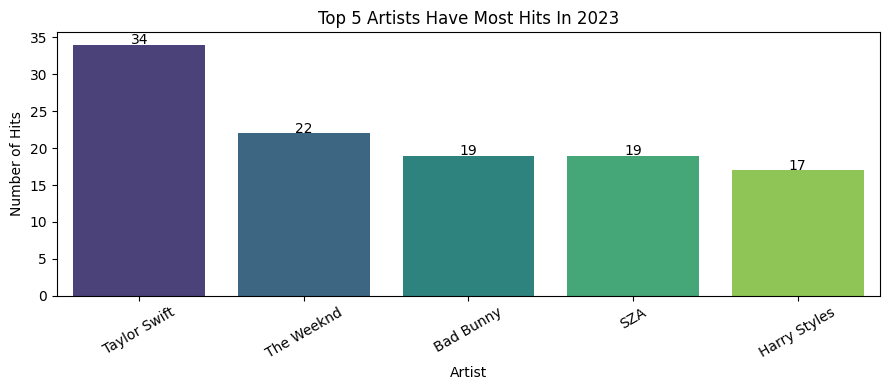

In [89]:
# Count the number of songs released by each artist
artist_counts = spotify_df['artist(s)_name'].value_counts()

# Select the top 5 artists
top_artists = artist_counts.head(5)

# Create the barplot
plt.figure(figsize=(9, 4))
ax = sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')

# Add exact numbers on top of each bar
for index, value in enumerate(top_artists.values):
    ax.text(index, value + .1, str(value), ha='center', fontweight='light')

# Customize plot
plt.title('Top 5 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

- The artists with the most hits in 2023, in descending order, are Taylor Swift, The Weeknd, Bad Bunny, SZA, and Harry Styles.

---

### **4. Temporal Trends** 

#### ***Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.*** 


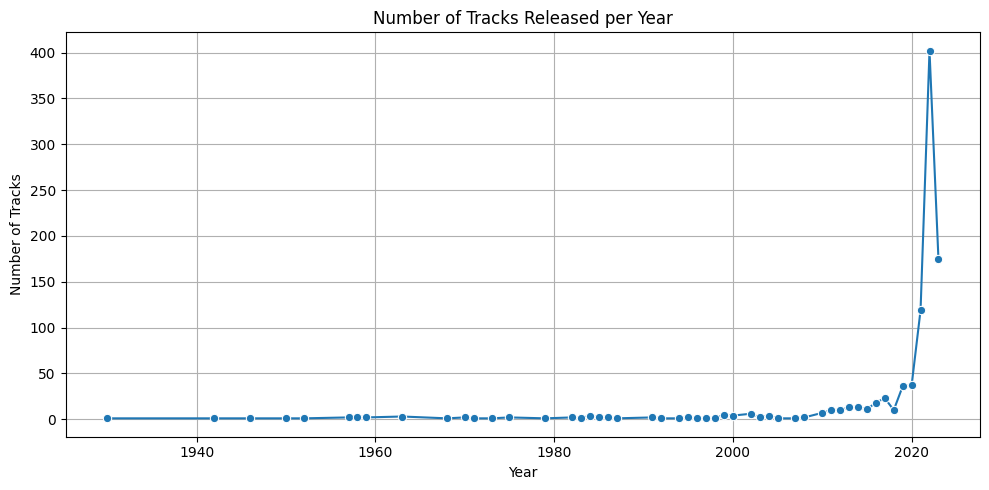

In [90]:
# Assuming the dataset is loaded into a DataFrame called spotify_df
# Count the number of tracks released per year
tracks_per_year = spotify_df['released_year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker='o')

# Customize plot
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

- The number of tracks released from around 2010s up to present were mostly the ones on the list, specifically, tracks released from 2022.

#### ***Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?***

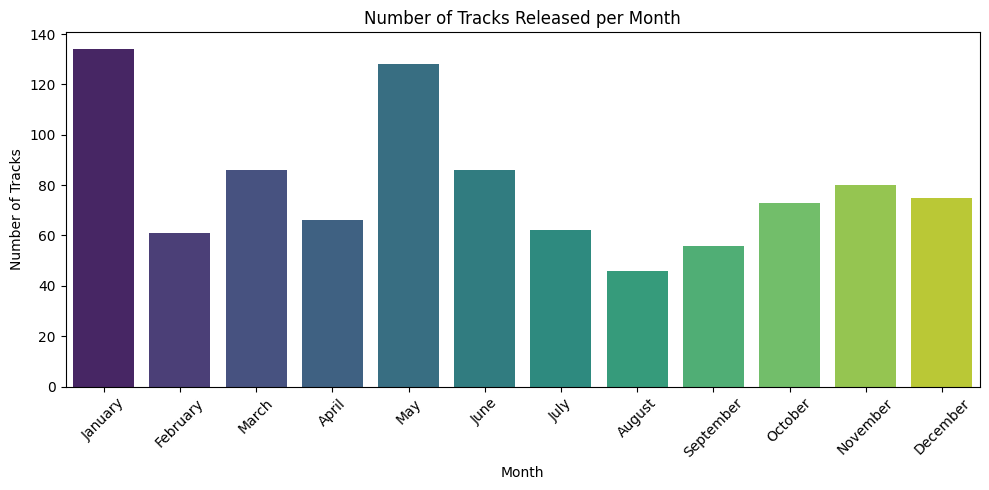

In [112]:
# Create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Count the number of tracks released per month
tracks_per_month = spotify_df['released_month'].value_counts().sort_index()

# Map the month numbers to month names for better readability
tracks_per_month.index = tracks_per_month.index.map(month_names)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, palette='viridis')

# Customize plot
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

- January is the month with the most number of released track.

---

### **5. Genre and Music Characteristics**

#### ***Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?***

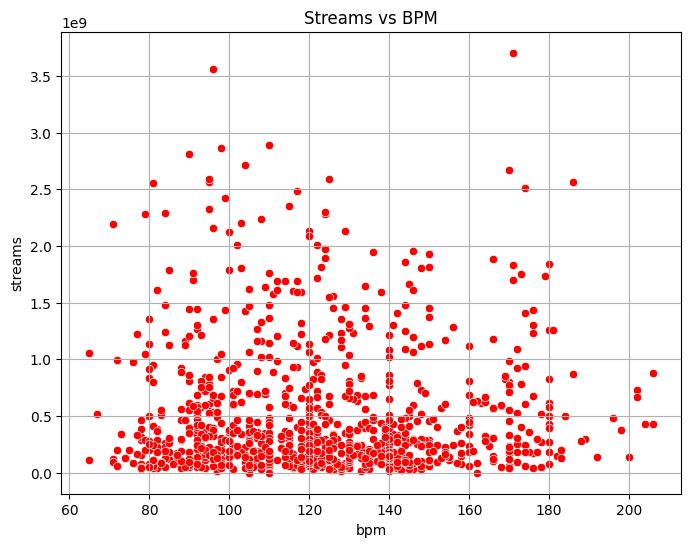

In [92]:
# Scatter plot for streams vs bpm with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['bpm'], y=spotify_df['streams'], color='red')
plt.title('Streams vs BPM')
plt.grid(True)  # Add grid lines
plt.show()

- The number of streams is higher on the range of 80 to 160 BPM

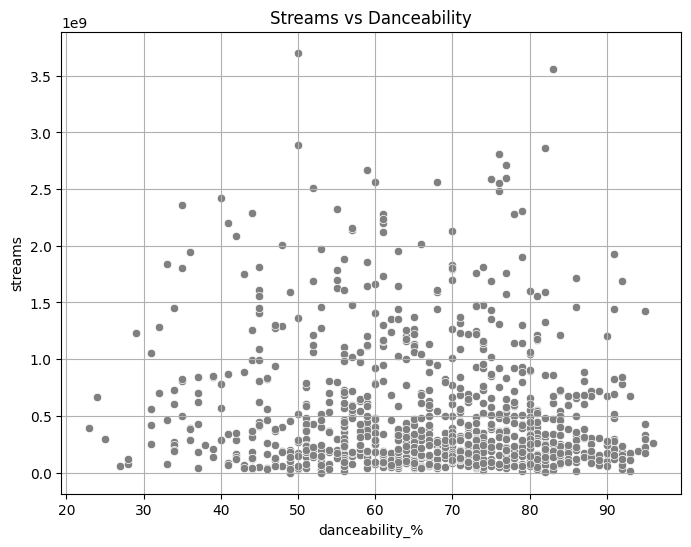

In [93]:
# Scatter plot for streams vs danceability_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['danceability_%'], y=spotify_df['streams'], color ='grey')
plt.title('Streams vs Danceability')
plt.grid(True)  # Add grid lines
plt.show()

- On the range of 50 to 80 danceability, the higher the number streams

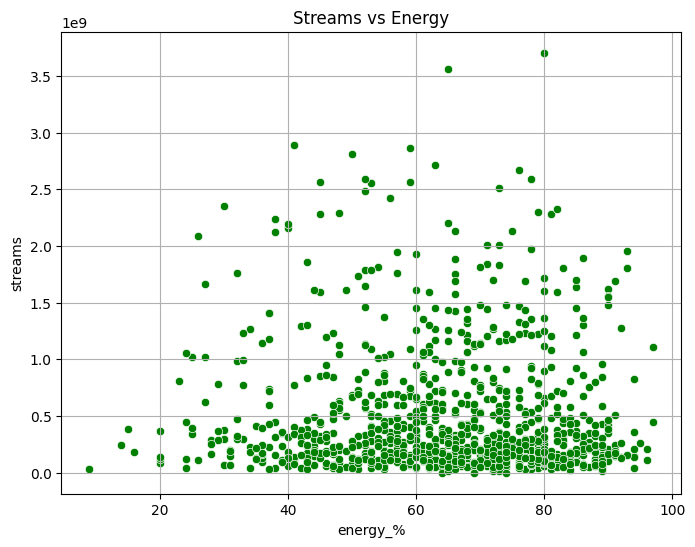

In [94]:
# Scatter plot for streams vs energy_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['energy_%'], y=spotify_df['streams'], color='green')
plt.title('Streams vs Energy')
plt.grid(True)  # Add grid lines
plt.show()

- Songs having an energy percentage between 60-80 tend to have more streams.

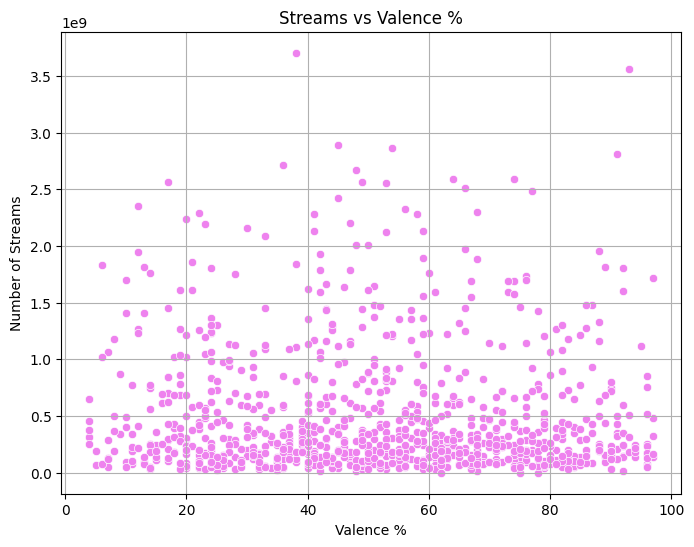

In [95]:
# Scatter plot for streams vs valence_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['valence_%'], y=spotify_df['streams'], color ='violet')
plt.title('Streams vs Valence %')
plt.grid(True)  # Add grid lines
plt.xlabel('Valence %')
plt.ylabel('Number of Streams')
plt.show()


- The plot was spread pretty evenly maybe because the level of valence highly-depends on a person's current mood.

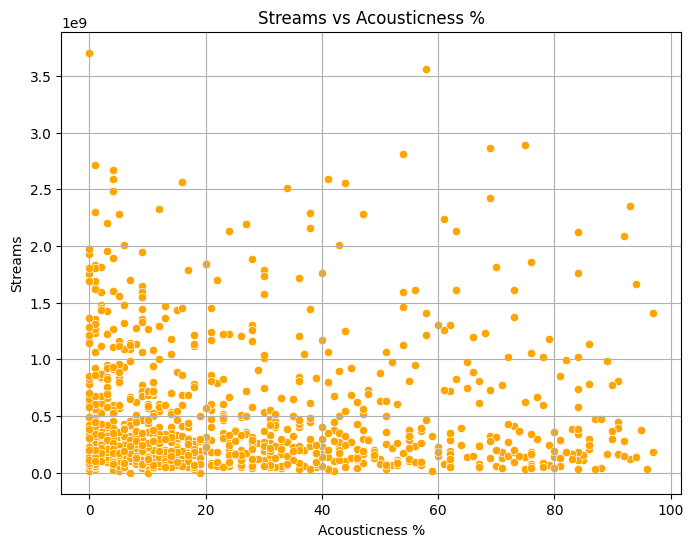

In [96]:
# Scatter plot for streams vs acousticness_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['acousticness_%'], y=spotify_df['streams'], color='orange')
plt.title('Streams vs Acousticness %')
plt.grid(True)  # Add grid lines
plt.xlabel('Acousticness %')
plt.ylabel('Streams')
plt.show()

- The number of stream increases as the acousticness percentage decreases

---

### **6. Platform Popularity**

#### ***How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?***

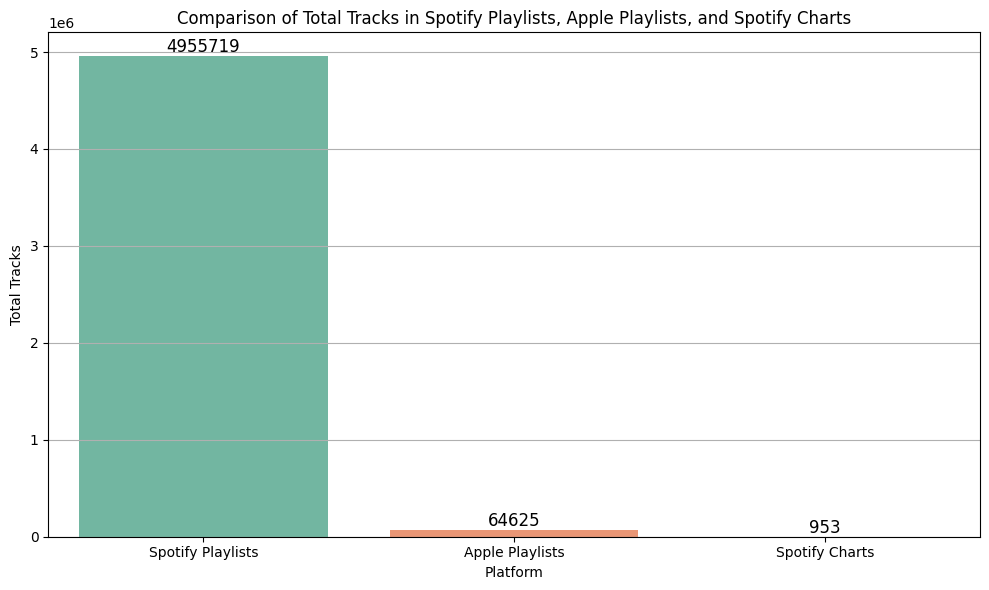

In [97]:
# Step 1: Calculate total tracks in each platform
spotify_playlists_total = spotify_df['in_spotify_playlists'].sum()
apple_playlists_total = spotify_df['in_apple_playlists'].sum()
spotify_charts_total = spotify_df['in_spotify_charts'].count()  # Count tracks in charts

# Step 2: Prepare the data for visualization
data = {
    'Platform': ['Spotify Playlists', 'Apple Playlists', 'Spotify Charts'],
    'Total Tracks': [spotify_playlists_total, apple_playlists_total, spotify_charts_total]
}

platform_comparison_df = pd.DataFrame(data)

# Step 3: Plot the comparison of total tracks across platforms
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Platform', y='Total Tracks', data=platform_comparison_df, palette='Set2')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Comparison of Total Tracks in Spotify Playlists, Apple Playlists, and Spotify Charts')
plt.xlabel('Platform')
plt.ylabel('Total Tracks')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 4: Identify which platform favors the most popular tracks
most_favored_platform = platform_comparison_df.loc[platform_comparison_df['Total Tracks'].idxmax()]


- The Spotify playlist tends to be a more favorable platform than the Apple playlist and Spotify chart. This is definitely due to the Apple Playlist having limited amount of tracks, and the Spotify chart's standards being way too picky due to a large amount of tracks they have.

---

### **7. Advanced Analysis**


#### ***Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?***

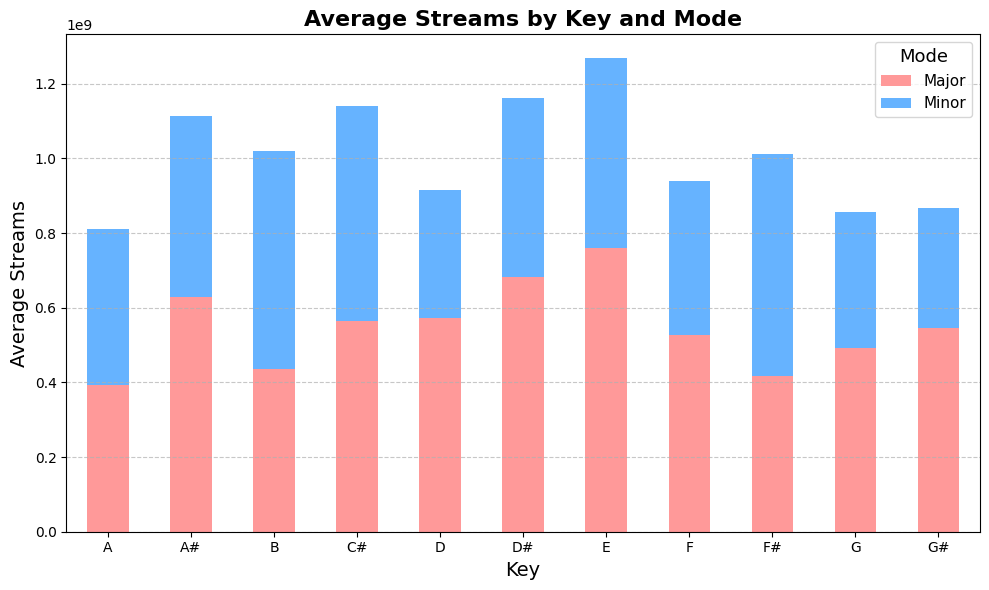

In [98]:
# Convert 'streams' column to numeric type, coercing errors to NaN
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

# Group by 'key' and 'mode', calculating the mean of 'streams'
key_mode_streams = spotify_df.groupby(['key', 'mode'])['streams'].mean().unstack()

# Define a color palette
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Modify colors as needed

# Plot average streams by key and mode
ax = key_mode_streams.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Customize the plot
plt.title('Average Streams by Key and Mode', fontsize=16, fontweight='bold')
plt.xlabel('Key', fontsize=14)
plt.ylabel('Average Streams', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.legend(title='Mode', title_fontsize='13', fontsize='11')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

- Tracks in major mode have a higher number of streams compared to those in minor mode.
- Tracks in the key of E have the highest average number of streams for major mode.
- Tracks in the key of C# have the highest average number of streams for minor mode.

#### ***Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.***

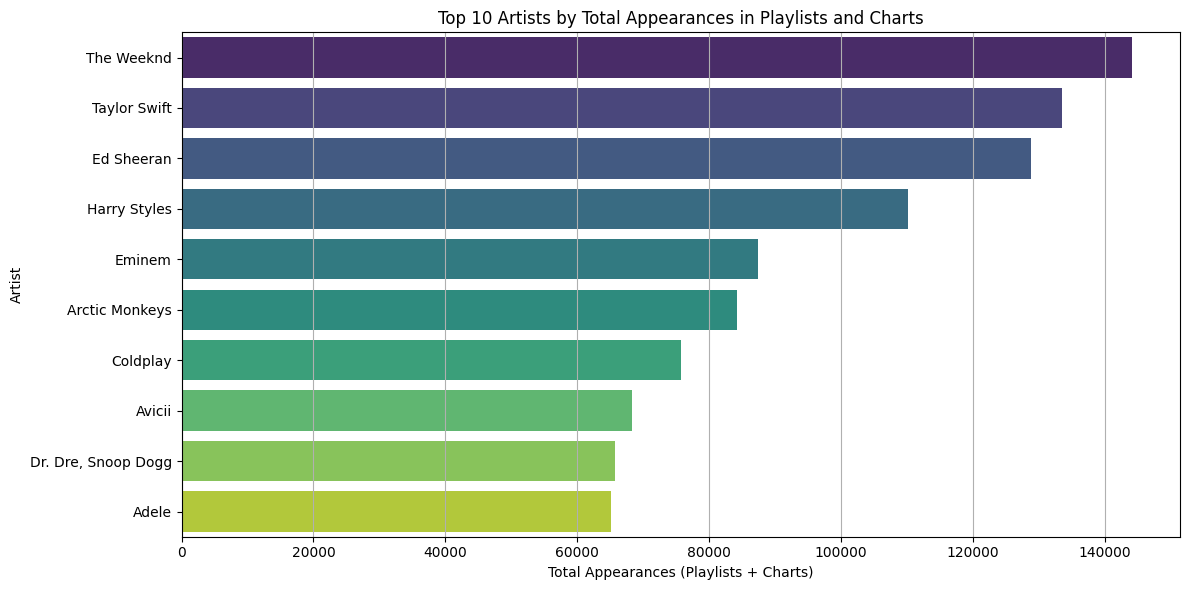

In [99]:
# Create DataFrame for playlists and charts, fill missing values, and aggregate totals
artist_appearance_counts = (
    spotify_df.groupby('artist(s)_name').agg(
        total_playlists=('in_spotify_playlists', 'sum'),
        total_charts=('in_spotify_charts', 'sum')
    ).fillna(0).reset_index()
)

# Calculate total appearances
artist_appearance_counts['total_appearances'] = artist_appearance_counts['total_playlists'] + artist_appearance_counts['total_charts']

# Sort and select top 10 artists for visualization
top_artists = artist_appearance_counts.sort_values(by='total_appearances', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_appearances', y='artist(s)_name', data=top_artists, palette='viridis')
plt.title('Top 10 Artists by Total Appearances in Playlists and Charts')
plt.xlabel('Total Appearances (Playlists + Charts)')
plt.ylabel('Artist')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- The Weeknd appeared more frequently in playlists and charts.
- Even though Eminem was not a Top 10 artist, his songs still placed fifth among the most appearances.